
# CRIM Intervals:  Melodic and Harmonic

### Basic Goals

- Examine Macro-level aspects of your Mass+Model corpus (with similarity Matrices and Cadence Maps)
- Examine Micro-level aspects of your Mass+Model corpus (exploring particular ngrams, presentation types, and cadences made evident at the macro-level)
- Draw some conclusions about the overall points of similarity and difference among some subset of your pieces

### Tasks in Detail  

### 1. Exploring Entry Melodies
- 1.1 **Load the piece(s)** from your corpus

#### Shared Entries (Macro Level)

- 1.2 use the **piece.modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces.  These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
- 1.3 The **heatmap of the modelFinder** results will show the relatedness clearly for your corpus.
- 1.4 Which **mass movements** are most similar to the model?  To each other?

#### Shared Modules (Macro Level)

- 1.5 Now use **piece.moduleFinder** to build a table summarizing the percentage of "contrapuntal modules" shared in your corpus. These modules are also the ones that occur around the entries found in the previous step.
- 1.6 Use the **heatmap of the moduleFinder** results to compare the relatedness in your corpus.
- 1.7 How do these two calculations compare across the corpus at a macro level?  Which pieces seem to use similar melodies in the same ways?  In different ways?

#### Shared Entries (Micro Level)
- 1.8 Which **specific entry melodies** are shared by the to most similar pieces?  The list will give you an idea of which melodies are involved.
- 1.9 Make a **HeatMap of the ngrams** in your pieces, and find your shared ngrams on them.
- 1.10 Based on the visual blocks of the HeatMap (and the offsets that show when you hover on them):
    - Where in your piece do these entries appear--at the outset, middle, near the end? 
    - Are they in roughly the same place in the two related movements/pieces?
    - What Presentation Types do these shared entries seem to be involved in?  PEN?  ID?  Fuga? 
- 1.11 Now return to the **Presentation Type** method (**piece.presentationTypes**) and see what the CRIM intervals says about your pair of pieces and the partcular ngrams/entries you are focusing on.
    - What types did it find?  Do you agree?  
    - If you search for Hidden Types, does it find still others?
    - Given that the composer of the Mass is definitely using soggetti from the Model, did they do the _same_ thing with that material as found in the model?  Or something different?  Do you they think they were being creative, or just going through the motions?
    - If you listen to the piece, do any of the machine patterns make sense to you?
    
### 2. Shared Cadences

- 2.1 About Cadence Methods

#### Shared Cadences (Macro Level)
- 2.2 Radar Plot the Cadences for Your Corpus (and compare)
- 2.3 Summary of Cadences by Tone and Type across your Corpus
--  For reference, this table might help you be more specific about the differences and simliarities among the pieces and the types of cadences they share.
-- Consider each in turn and think about what makes your pieces **similar** or **different**.
- 2.4. Your Commentary on the previous steps

- 2.5  Tablular Summary of the Cadences in your Corpus
- 2.6  Finding Last Lowest Tone of each Piece

#### Shared Cadences (Micro Level)
- 2.7  Plotting the Cadences in each piece as a Series
- 2.8  Finding Substrings of similar Cadences
- 2.9 ==> Your Commentary on the Cadence Tables and Charts
    
    
### 3.  Overall Conclusions

- How are your chosen pieces most related?  Most different?  Write a few sentences and provide some highlights from your analysis



#### Read Documentation for Each Method
- Read the documentation with this command `print(ImportedPiece.YourMethod.__doc__)`, where you will replace `'YourMethod'` with the name of the individual method, for example `print(ImportedPiece.melodic.__doc__)`


*** 

### A. Import Intervals and Other Code


In [1]:
import intervals
from intervals import * 
from intervals import main_objs
from os import listdir
import os.path
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from IPython.display import display
import requests
import os
import glob
import plotly.graph_objects as go
import intervals
from intervals import * 
from intervals import main_objs
from os import listdir
import os.path

# keep these functions

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

def _offset_joiner(a):
        b = ', '.join(map(str, a))
        return b

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing a Piece

* Choose ONE of the following!

### Importing Just One Model

In [2]:
# Import your Model

prefix = 'https://crimproject.org/mei/CRIM_Model_'

model_ID = '0008' # <== put your ID number here!

# join the strings and import piece
url = prefix + model_ID + '.mei'
piece = importScore(url)

print(piece.metadata)


{'title': 'Ave Maria', 'composer': 'Josquin Des Prés'}


### Importing One Full Mass

In [3]:
# Import Your Mass as a corpus
corpus = []
mass_id = "0019" # <== put your Mass number here!
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus.append(importScore(mass))

### Import Model and Mass as a Combined Corpus

In [4]:
# Import Your Mass and Model as a combined Corpus:
corpus_list = []
prefix = 'https://crimproject.org/mei/CRIM_Model_'

# select IDs for your Mass and Model
model_id = "0008"  # <==  put your model number here!
mass_id = "0005" # <== put your Mass number here!
model = prefix + model_id + '.mei'
corpus_list.append(model)
for l in range(1, 6):
    mass = f'https://crimproject.org/mei/CRIM_Mass_{mass_id}_{l:01}.mei'
    corpus_list.append(mass)
corpus_list

['https://crimproject.org/mei/CRIM_Model_0008.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_1.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_2.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_3.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_4.mei',
 'https://crimproject.org/mei/CRIM_Mass_0005_5.mei']

In [5]:
corpus = CorpusBase(corpus_list)

# Shared Entries (Macro Level)



### 1.1 Melodic Entries as Similarity Matrix

* Use the **modelFinder** method to build a table summarizing the percentage of "entries" shared among the pieces. 
* These "entries" are soggetti (expressed as melodic ngrams) that begin after a rest or a section break.  They are thus the most likely soggetti to be remembered and the most likely to be used in important presentation types.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
thematic (i.e. recurring) melodies can be found as thematic melodies in all the other pieces in your corpus**. The
specific number of times they appear in the model is not considered, provided that it is
at least two.


### How to Read the Results:

* As you read across, you will see the percentage of melodies in the row value that come from the corresponding column value.  

### Provide Your Commentary as indicated


In [6]:
# Or build a List by hand:
corpus_list = ['https://raw.githubusercontent.com/Elenacrod/Buch1/main/Gloriose_confesor_Guerrero.xml', 
'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Kyrie.xml', 
'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Gloria.xml', 
'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Credo.xml', 
'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Sanctus.xml', 
'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Agnus.xml']
corpus_list

['https://raw.githubusercontent.com/Elenacrod/Buch1/main/Gloriose_confesor_Guerrero.xml',
 'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Kyrie.xml',
 'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Gloria.xml',
 'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Credo.xml',
 'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Sanctus.xml',
 'https://raw.githubusercontent.com/Elenacrod/Buch1/main/Missa_Gloriose_Confesor_Domini_Agnus.xml']

In [7]:
corpus = CorpusBase(corpus_list)
similarity_matrix = corpus.modelFinder()
similarity_matrix

Model,Gloriose_confesor_Guerrero,Missa_Gloriose_Confesor_Domini_Kyrie,Missa_Gloriose_Confesor_Domini_Gloria,Missa_Gloriose_Confesor_Domini_Credo,Missa_Gloriose_Confesor_Domini_Sanctus,Missa_Gloriose_Confesor_Domini_Agnus
Mass,,,,,,
Gloriose_confesor_Guerrero,1.000000,0.120000,0.440000,0.500000,0.320000,0.140000
Missa_Gloriose_Confesor_Domini_Kyrie,0.531250,1.000000,0.531250,0.468750,0.468750,0.000000
Missa_Gloriose_Confesor_Domini_Gloria,0.675676,0.189189,1.000000,0.783784,0.513514,0.054054
Missa_Gloriose_Confesor_Domini_Credo,0.476923,0.138462,0.523077,1.000000,0.261538,0.076923
Missa_Gloriose_Confesor_Domini_Sanctus,0.818182,0.363636,0.818182,0.818182,1.000000,0.000000
Missa_Gloriose_Confesor_Domini_Agnus,0.500000,0.000000,0.250000,0.500000,0.000000,1.000000


###  1.2 The Melodic Matrix as Heatmap

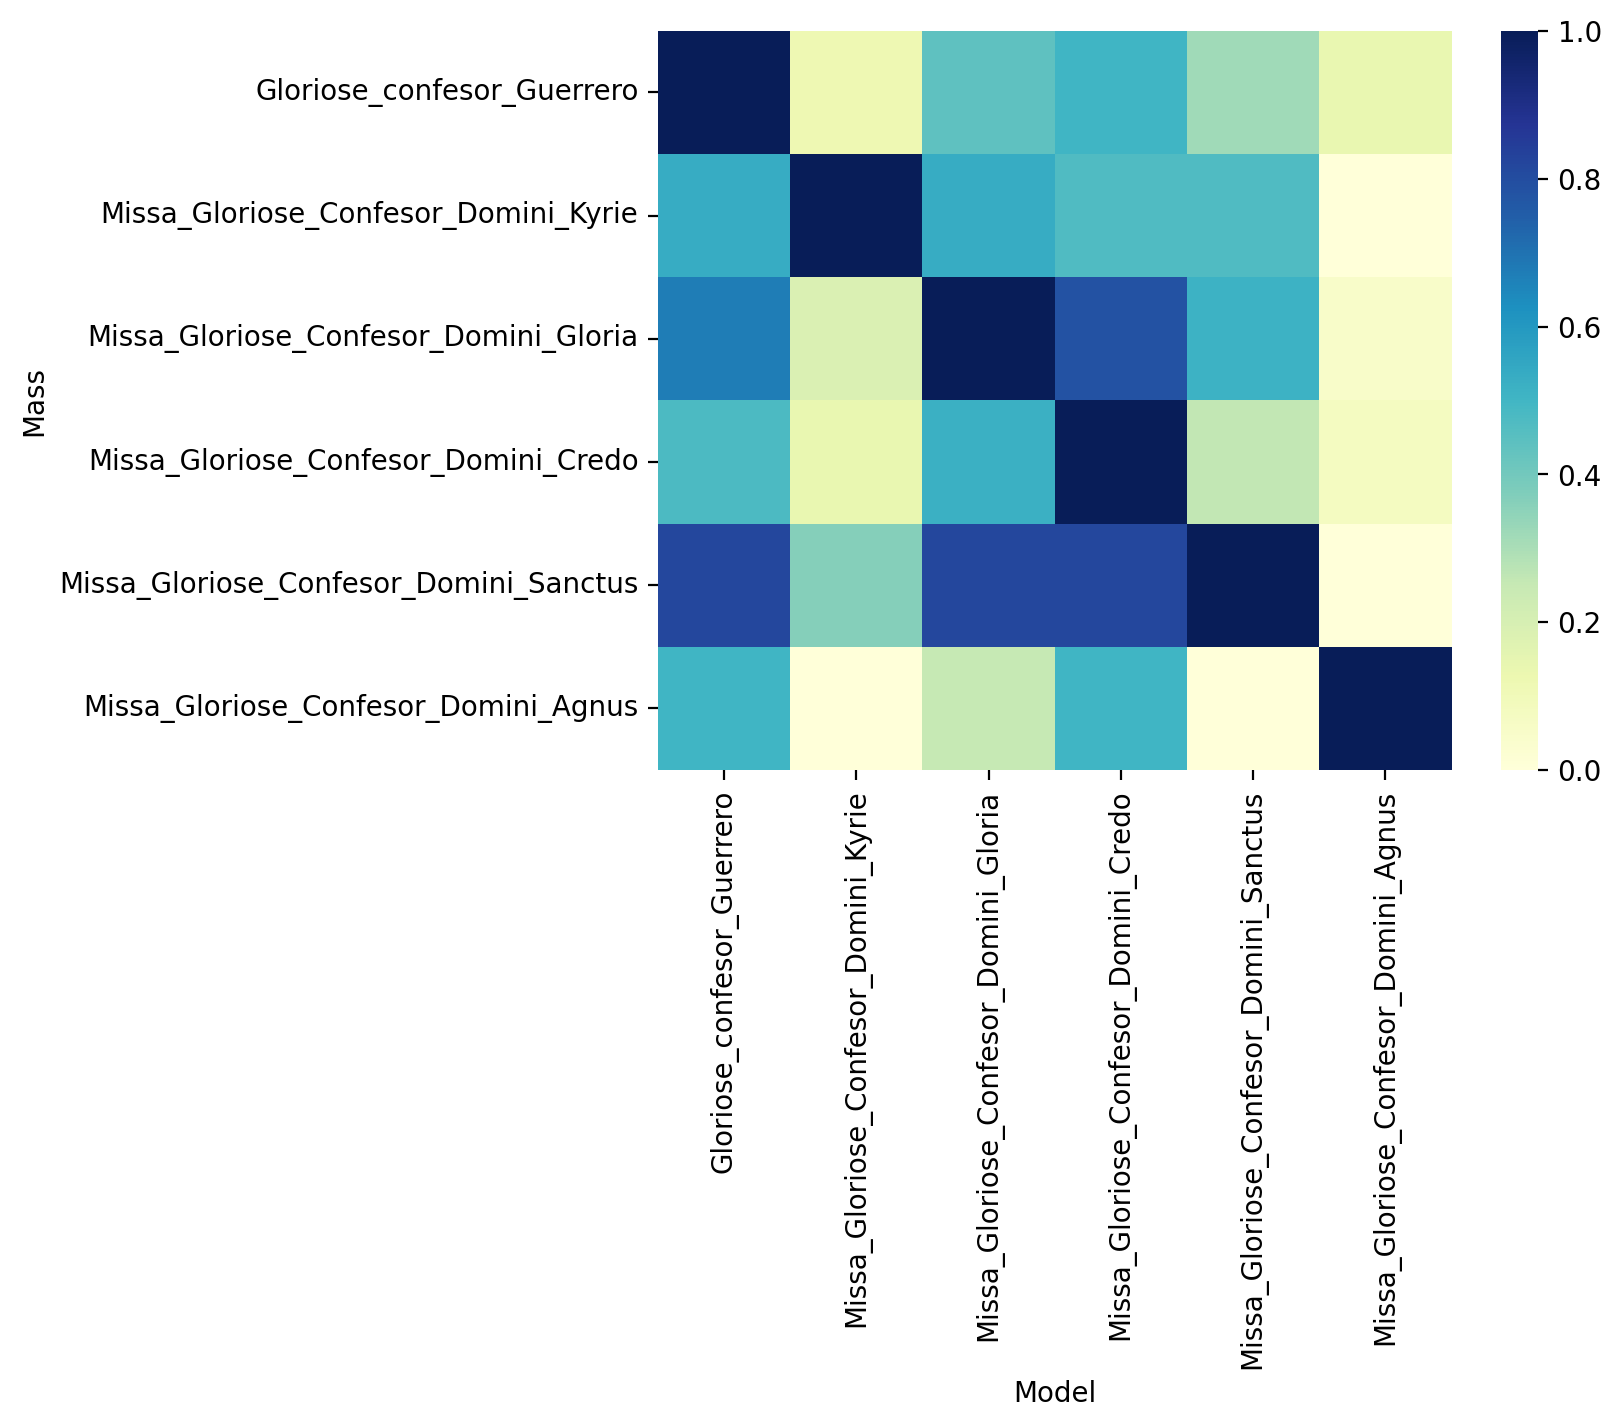

In [8]:
# melodic matrix
dataplot = sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=False)
plt.show()


In [9]:
model_list = ['https://crimproject.org/mei/CRIM_Model_0019.mei']
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0019_1.mei',
             'https://crimproject.org/mei/CRIM_Mass_0019_2.mei',
              'https://crimproject.org/mei/CRIM_Mass_0019_3.mei',
                'https://crimproject.org/mei/CRIM_Mass_0019_4.mei',
            'https://crimproject.org/mei/CRIM_Mass_0019_5.mei']

In [10]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
cross_plot = mod_corp.modelFinder(masses=mass_corp, models=mod_corp)
cross_plot

Model,CRIM_Model_0019
Mass,
CRIM_Mass_0019_1,0.647059
CRIM_Mass_0019_2,0.840909
CRIM_Mass_0019_3,0.448276
CRIM_Mass_0019_4,0.590909
CRIM_Mass_0019_5,0.931034


## ==> 1.4 Put your commentary on the shared entries matrix below

* Which pieces in your set seem to be most closely related in terms of melodic entries?  Which ones are not?  Which movements of the Mass seem to share the most entries with each other?

# Shared Modules (Macro Level)

### 1.5 Contrapuntal (Modular) Ngrams as Similarity Matrix

* **Contrapuntal Modules** are 'ngrams' that represent the motion of a pair of voices.  The tool finds the patterns between every pair of voices, then filters these to correspond to the moments of the 'entries'.  So it tells us not only that there are shared melodies, but what is happening to the melodies in their contrapuntal context.
* `moduleFinder`  method identifies all of the `modular ngrams` in each piece that **coincide with the melodic entries**.  These are the modules found in _all_ voices around the moment of the given melodic entry, so they will
include both the entries and other soggetti, too.

* Lists of unique modular ngrams are then compared across the corpus, resulting in a matrix of values.
* This method returns a "driving distance table" showing how likely each model was a source for each mass. This
is represented by a score 0-1 where 0 means that this relationship was highly unlikely
and 1 means that the the two are highly likely to be related in this way (or that a
piece was compared to itself). Specifically, **the value is the percentage of each piece's
modular ngrams (the ones that occur at the moment of the entries) can be found in each of the other pieces in the corpus.**

#### How to Read the Results:
    - As you read across, you will see the percentage of modular ngrams in the row value that come from the corresponding column value.  

In [38]:
corpus = CorpusBase(corpus_list)
module_matrix = corpus.moduleFinder()
module_matrix

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


Model,Gloriose_confesor_Guerrero,Missa_Gloriose_Confesor_Domini_Kyrie,Missa_Gloriose_Confesor_Domini_Gloria,Missa_Gloriose_Confesor_Domini_Credo,Missa_Gloriose_Confesor_Domini_Sanctus,Missa_Gloriose_Confesor_Domini_Agnus
Mass,,,,,,
Gloriose_confesor_Guerrero,1.000000,0.175676,0.199324,0.192568,0.168919,0.162162
Missa_Gloriose_Confesor_Domini_Kyrie,0.212329,1.000000,0.178082,0.184932,0.171233,0.164384
Missa_Gloriose_Confesor_Domini_Gloria,0.209821,0.142857,1.000000,0.343750,0.205357,0.116071
Missa_Gloriose_Confesor_Domini_Credo,0.147826,0.121739,0.214493,1.000000,0.127536,0.110145
Missa_Gloriose_Confesor_Domini_Sanctus,0.229508,0.180328,0.344262,0.245902,1.000000,0.147541
Missa_Gloriose_Confesor_Domini_Agnus,0.285714,0.238095,0.190476,0.214286,0.214286,1.000000


### 1.6 Module Matrix as Heatmap

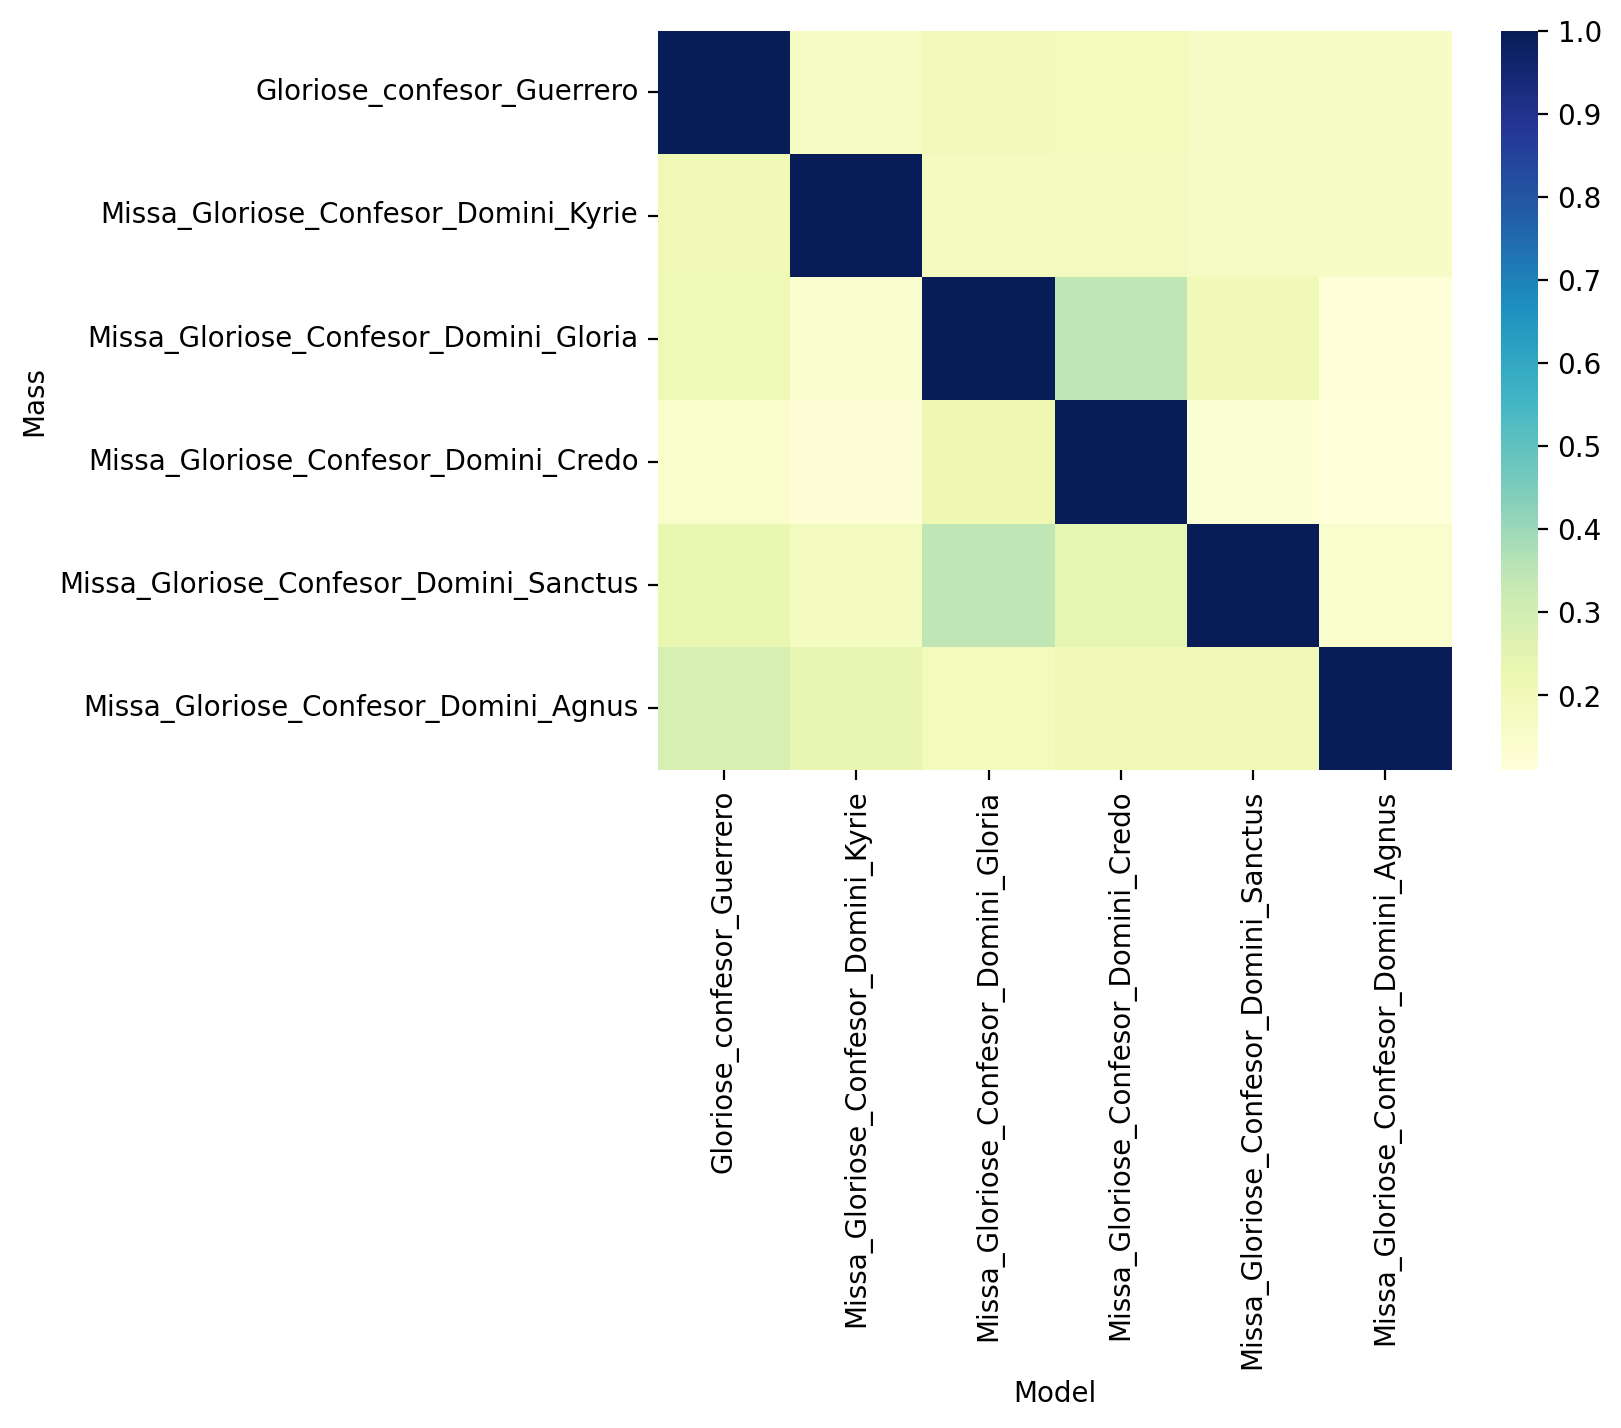

In [39]:
# module matrix

dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

In [40]:
similarity_matrix.compare(module_matrix).round(2)

Model                                  Gloriose_confesor_Guerrero        \
                                                             self other   
Mass                                                                      
Gloriose_confesor_Guerrero                                    NaN   NaN   
Missa_Gloriose_Confesor_Domini_Kyrie                         0.53  0.21   
Missa_Gloriose_Confesor_Domini_Gloria                        0.68  0.21   
Missa_Gloriose_Confesor_Domini_Credo                         0.48  0.15   
Missa_Gloriose_Confesor_Domini_Sanctus                       0.82  0.23   
Missa_Gloriose_Confesor_Domini_Agnus                         0.50  0.29   

Model                                  Missa_Gloriose_Confesor_Domini_Kyrie  \
                                                                       self   
Mass                                                                          
Gloriose_confesor_Guerrero                                             0.12   
Missa_Gloriose_Confesor_Domini_Kyrie                                    NaN   
Missa_Gloriose_Confesor_Domini_Gloria                                  0.19   
Missa_Gloriose_Confesor_Domini_Credo                                   0.14   
Missa_Gloriose_Confesor_Domini_Sanctus                                 0.36   
Missa_Gloriose_Confesor_Domini_Agnus                                   0.00   

Model                                         \
                                       other   
Mass                                           
Gloriose_confesor_Guerrero              0.18   
Missa_Gloriose_Confesor_Domini_Kyrie     NaN   
Missa_Gloriose_Confesor_Domini_Gloria   0.14   
Missa_Gloriose_Confesor_Domini_Credo    0.12   
Missa_Gloriose_Confesor_Domini_Sanctus  0.18   
Missa_Gloriose_Confesor_Domini_Agnus    0.24   

Model                                  Missa_Gloriose_Confesor_Domini_Gloria  \
                                                                        self   
Mass                                                                           
Gloriose_confesor_Guerrero                                              0.44   
Missa_Gloriose_Confesor_Domini_Kyrie                                    0.53   
Missa_Gloriose_Confesor_Domini_Gloria                                    NaN   
Missa_Gloriose_Confesor_Domini_Credo                                    0.52   
Missa_Gloriose_Confesor_Domini_Sanctus                                  0.82   
Missa_Gloriose_Confesor_Domini_Agnus                                    0.25   

Model                                         \
                                       other   
Mass                                           
Gloriose_confesor_Guerrero              0.20   
Missa_Gloriose_Confesor_Domini_Kyrie    0.18   
Missa_Gloriose_Confesor_Domini_Gloria    NaN   
Missa_Gloriose_Confesor_Domini_Credo    0.21   
Missa_Gloriose_Confesor_Domini_Sanctus  0.34   
Missa_Gloriose_Confesor_Domini_Agnus    0.19   

Model                                  Missa_Gloriose_Confesor_Domini_Credo  \
                                                                       self   
Mass                                                                          
Gloriose_confesor_Guerrero                                             0.50   
Missa_Gloriose_Confesor_Domini_Kyrie                                   0.47   
Missa_Gloriose_Confesor_Domini_Gloria                                  0.78   
Missa_Gloriose_Confesor_Domini_Credo                                    NaN   
Missa_Gloriose_Confesor_Domini_Sanctus                                 0.82   
Missa_Gloriose_Confesor_Domini_Agnus                                   0.50   

Model                                         \
                                       other   
Mass                                           
Gloriose_confesor_Guerrero              0.19   
Missa_Gloriose_Confesor_Domini_Kyrie    0.18   
Missa_Gloriose_Confesor_Domini_Gloria   0.34   
Missa_Gloriose_Confesor_D

## ==>  Put your commentary on the shared modules matrix below

* Which pieces in your set seem to be most closely related in terms of modular entries?  Which ones are not?  Which movements of the Mass seem to share the most modular with each other?


# Shared Entries (Micro Level)

#### Here we explore _where_ and _how_ the shared melodies are presented in each piece

* Load a specific pair of closely related pieces from your corpus
* Find exactly which melodic entries are shared
* Find out *where* these melodies occur in each piece
* Check the Fuga, PEN, and ID Presentation Types to see how the melodies are treated in each piece.  Pick one or two melodies (and Presentation Types) as examples to describe.


In [41]:
# Specify the Model
model = corpus_list[0] # <== the model will be score "0"
model = importScore(model)

# Specify the Mass Movement(s)
mass_movement = corpus_list[1] # <== select the index number of your mass from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

Previously imported piece detected.
Previously imported piece detected.
{'title': 'Gloriose confesor Domini', 'composer': 'Francisco Guerrero\nMaría Elena Cuenca (ed.)'} {'title': 'Missa Gloriose confesor Domini_Kyrie', 'composer': 'Fernandez Buch'}


### Get the Entries and Detailed Index for A Pair of Pieces

In [42]:
# for the model
model_entries = model.entries(thematic=True, anywhere=True, n=4)
# model_entries = model_entries.applymap(convertTuple)
model_entries_det = model.detailIndex(model_entries, offset=True, progress=True)

# for the mass movement
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
# mass_movement_entries = mass_movement_entries.applymap(convertTuple)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=True, progress=True)

# check the detailed view as needed for each
# model_entries_det
# mass_movement_entries_det

### 1.8 Find the nGrams shared by your pieces

In [43]:

model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[1:]
shared_entries


[('-2', '-2', '2', '-2'), ('-2', '-2', '-2', '-2'), ('-2', '-2', '2', '2')]

### 1.9 Make a Heatmap of Shared Entries in Two Pieces

* Let's look at **where** the shared melodies appear in each of your pieces.

* Judging only from the visualization, where do the shared melodies appear, and how similar does the treatment of them seem to be?

#### Note that you can also decide to compare one MASS movement with another MASS movement!


### Model Heatmap

In [25]:
## Use this for the Model Heatmap

nr = model.notes(combineUnisons=True) 
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = model.ngrams(df=mel, n=4)
entry_ngrams = model.entries(df=mel, n=4)
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])


AttributeError: 'str' object has no attribute 'notes'

### Mass Movement Heatmap

In [49]:
## Use this for the Mass Movement Heatmap

nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[])

alt.VConcatChart(...)

## ==> 1.10 Your Commentary about the Heatmaps

* Based on what you can see, **what do the composers seem to be doing with the shared melodies**?  
* Do the composers use **certain melodies in the same approximate position**?  
* Do they move through these melodies in the **same order or sequence** over the course of the piece?  
* What **Presenation Types (Fuga, PEN, ID) seems to be involved**?  
* Do any melodies seem particular worth comparing in terms of their treatment in the two pieces?  

#### Make the Short Lists of These Shared Ngrams and Their Offsets

In [50]:
# for the model
model_short_list = model_entries_det[model_entries_det.isin(shared_entries)].dropna(how='all').stack()
model_offsets_of_shared_entries = model_short_list.index.get_level_values(2)
model_offsets_of_shared_entries = model_offsets_of_shared_entries.unique()

# for the mass movement
mass_movement_short_list = mass_movement_entries_det[mass_movement_entries_det.isin(shared_entries)].dropna(how='all').stack()
mass_movement_offsets_of_shared_entries = mass_movement_short_list.index.get_level_values(2)
mass_movement_offsets_of_shared_entries = mass_movement_offsets_of_shared_entries.unique()


### 1.11 Get Shared Entries as Presentation Types

* Note that not all shared entries will be used as Fuga, ID, and PEN but for those that appear in a pair of pieces, it can be informative to compare **how** they are treated!



In [51]:
# here we filter the PTypes to include ONLY those found in both the model and Mass movement

# here for the model
model_p_types = model.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)

model_shared_entry_ptypes = model_p_types[model_p_types.First_Offset.isin(model_offsets_of_shared_entries)]
model_ptypes = model_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])

# here for the Mass movement


mass_movement_p_types = mass_movement.presentationTypes(limit_to_entries = True,
                        body_flex = 0,
                        head_flex = 1,
                        include_hidden_types = False,
                        combine_unisons = True,
                       melodic_ngram_length = 4)


mass_movement_shared_entry_ptypes = mass_movement_p_types[mass_movement_p_types.First_Offset.isin(mass_movement_offsets_of_shared_entries)]
mass_movement_ptypes = mass_movement_shared_entry_ptypes.drop(columns=['Offsets', 'Number_Entries', 'Flexed_Entries', "Parallel_Entries", 'Parallel_Voice', 'Count_Non_Overlaps'])
combined_ptypes = pd.concat([model_ptypes, mass_movement_ptypes])


### 1.11 (sorted!)  Now, Sort the Results so we see the Shared Melodies Together


In [52]:
combined_ptypes.sort_values('Soggetti')

,Composer,Title,First_Offset,Measures_Beats,Melodic_Entry_Intervals,Soggetti,Time_Entry_Intervals,Voices,Presentation_Type
6,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Kyrie,510.0,"[62/4.0, 64/2.0]",[P5],"[(-2, 2, 2, 2)]",[12.0],"[Tenor, Altus]",FUGA
3,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,394.0,"[50/2.0, 51/4.0, 53/2.0, 55/2.0, 56/4.0, 59/1....","[P5, P-8, P4, P5, P-8, P8, P-4, P-5]","[(-2, 2, 3, -2)]","[12.0, 12.0, 16.0, 12.0, 18.0, 22.0, 4.0, 16.0]","[Altus, Cantus, Bassus, Tenor, Altus, Bassus, ...",FUGA
5,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Kyrie,458.0,"[56/2.0, 58/4.0, 61/3.0, 63/2.0]","[P-8, P-5, P12]","[(-2, 2, 3, -2)]","[20.0, 22.0, 14.0]","[Cantus, Tenor, Bassus, Cantus]",FUGA
2,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Kyrie,160.0,"[20/1.0, 24/1.0, 30/2.0, 33/1.0, 35/3.0, 39/3.0]","[P-8, P1, P4, P-8, P5]","[(-3, 2, 2, -2)]","[32.0, 50.0, 22.0, 20.0, 32.0]","[Cantus, Tenor, Bassus, Altus, Bassus, Bassus]",FUGA
1,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,150.0,"[19/4.0, 21/4.0, 22/4.0, 25/4.0, 27/4.0, 29/4....","[P8, P-5, P-4, P-5, P8, P8, P-11]","[(-3, 2, 2, -2), (-2, 2, 2, -2)]","[16.0, 8.0, 24.0, 16.0, 16.0, 20.0, 24.0]","[Tenor, Cantus, Altus, Tenor, Bassus, Altus, C...",FUGA
0,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,0.0,"[1/1.0, 2/1.0, 6/1.0, 7/1.0, 11/3.0, 14/1.0, 1...","[P-5, P-4, P-5, P8, P5, P-8]","[(-3, 3, 2, -2)]","[8.0, 32.0, 8.0, 36.0, 20.0, 24.0]","[Cantus, Altus, Tenor, Bassus, Altus, Cantus, ...",FUGA
0,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Kyrie,0.0,"[1/1.0, 2/1.0, 6/1.0, 7/1.0]","[P-5, P-4, P-5]","[(-3, 3, 2, -2)]","[8.0, 32.0, 8.0]","[Cantus, Altus, Tenor, Bassus]",ID


## 1.11 ==> Your Commentary on the Presentation Type Comparison

* Based on your estimation from the heatmap (above), what seems to be going on as the composer of the Mass quotes or transforms melodies from the Model?  
* Pick **two or three shared melodies** and consider how the composer of the Mass and Model have treated them.  
* What is the same or different about the **Time_Entry_Intervals** and  the **Melodic_Entry_Intervals**?  The overall predicted **Presentation_Type**?




# 2. Exploring Cadences

### 2.1 Comparing Cadences with Radar Plots and Tables (Macro Level)

How do the cadential plans of your pieces compare?  Which pieces are similar or distinctive?

In this section you will explore the 'tonal footprint' of your pieces with the Radar Plot tool.

The tool counts and plots the number of cadences that end on a particular tone.  

It also can provide a more detailed view that counts and plots the sub-types of cadences (some are strong, others weak).


* Of course longer movements such as _Gloria_ and _Credo_ are likely to involve more cadences than short pieces.
* But do the plots for the various pieces in your corpus resemble each other in overvall shape?
* Are there any outliers?
* What are the two or three main *tones* used in the cadences?

Options:
```
corpus.compareCadenceRadarPlots(combinedType=False, displayAll=True)
```


### 2.2 Radar Plot the Cadences for Your Corpus

You have various choices: 

* ```combinedType=False``` is relatively simple--just the **final tone** of each cadence in each piece
* ```combinedType=False``` gives the **final tone and the special type** of the cadence (evaded or otherwise modified)
* ```displayAll=True``` shows the cadences against a range of all possible cadences, with "D" at the top, then moving ahead by fifth (to A, E, etc)
* ```displayAll=True``` shows only the cadence tones that appear in these pieces
* It is also possible to limit the display to cadences involving on a specific number of voices:  ```sounding=3```

In [7]:
corpus.compareCadenceRadarPlots(combinedType=False, displayAll=True, renderer='iframe')

### 2.3  Summary of Cadences by Tone and Type across your Corpus

* For reference, this table might help you be more specific about the differences and simliarities among the pieces and the types of cadences they share.


In [55]:
func = ImportedPiece.cadences
list_of_dfs = corpus.batch(func=func, kwargs={'keep_keys': True}, metadata=True)
combined_df = pd.concat(list_of_dfs, ignore_index=False)
col_list = ['Composer', 'Title', 'Measure', 'Beat', 'CadType', 'Tone', 'Progress']
combined_df = combined_df[col_list]
grouped_types = combined_df.groupby(['Tone', 'CadType', 'Composer', 'Title']).size().reset_index(name='counts')
grouped_types


,Tone,CadType,Composer,Title,counts
0,A,Abandoned Authentic,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,1
1,A,Abandoned Authentic,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Gloria,1
2,A,Abandoned Clausula Vera,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,1
3,A,Altizans Only,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,1
4,A,Authentic,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Agnus Dei,1
...,...,...,...,...,...
79,G,Evaded Clausula Vera,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,1
80,G,Evaded Clausula Vera,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Gloria,3
81,G,Evaded Clausula Vera,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Kyrie,1
82,G,Evaded Clausula Vera,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,1


### Optional Radar for ONE piece at a time

In [60]:
piece.cadenceRadarPlot(combinedType=True, displayAll=False)

## 2.4 ==> Your Commentary on the Radar Plots

Consider each in turn and think about what makes your pieces **similar** or **different**:


* Of course longer movements such as _Gloria_ and _Credo_ are likely to involve more cadences than short pieces.
* But do the plots for the various pieces in your corpus **resemble each other in overvall shape**?
* Are there any **outliers**?
* What are the **two or three main *tones* used in the cadences**?
* Which piece seems most varied (in terms of cadence tones and types?) Which is the most boring?
* What new information does the **combined view** offer as we see the sub-types for each tone?


### 2.5 Cadences as Table (in Order of their Apperance--Micro Level)

* Here you can begin to think about the **order** of the cadences in your piece, rather than simply the counts in the aggregate as we find in the Radar Plot.

* We should also consider the final lowest tone of the piece, which is a good indicator of the overall modality of the composition.

* "Progress" is a measure from O to 1 of the relative position of this cadence in the piece.



### 2.5b For a Single Piece

In [25]:
# you might need to make a copy of this cell in order to compare more than one piece easily!

# change model to 'model' or 'mass_movement' below
work = corpus_list[0] # <== the model will be score "0", the mass movements will be 1, 2, 3, 4, 5
piece = importScore(work)
cadences_df = piece.cadences()
cadences_df.drop(columns=["CVFs", "LeadingTones", "Low", "RelLow", "RelTone", "TSig", "Sounding", "SinceLast", "ToNext"])

Previously imported piece detected.


,CadType,Tone,Measure,Beat,Progress,Composer,Title
48.0,Abandoned Authentic,NaN,7,1.0,0.036145,Pierre de Manchicourt,Quo abiit dilectus tuus
64.0,Evaded Clausula Vera,NaN,9,1.0,0.048193,Pierre de Manchicourt,Quo abiit dilectus tuus
72.0,Clausula Vera,G,10,1.0,0.054217,Pierre de Manchicourt,Quo abiit dilectus tuus
88.0,Abandoned Authentic,NaN,12,1.0,0.066265,Pierre de Manchicourt,Quo abiit dilectus tuus
120.0,Abandoned Authentic,NaN,16,1.0,0.090361,Pierre de Manchicourt,Quo abiit dilectus tuus
136.0,Abandoned Authentic,NaN,18,1.0,0.102410,Pierre de Manchicourt,Quo abiit dilectus tuus
148.0,Evaded Altizans Only,NaN,19,3.0,0.111446,Pierre de Manchicourt,Quo abiit dilectus tuus
168.0,Evaded Authentic,G,22,1.0,0.126506,Pierre de Manchicourt,Quo abiit dilectus tuus
184.0,Phrygian Clausula Vera,D,24,1.0,0.138554,Pierre de Manchicourt,Quo abiit dilectus tuus
216.0,Clausula Vera,F,28,1.0,0.162651,Pierre de Manchicourt,Quo abiit dilectus tuus


In [26]:
# you might need to make a copy of this cell in order to compare more than one piece easily!

# change model to 'model' or 'mass_movement' below
work = corpus_list[1] # <== the model will be score "0", the mass movements will be 1, 2, 3, 4, 5
piece = importScore(work)
cadences_df = piece.cadences()
cadences_df.drop(columns=["CVFs", "LeadingTones", "Low", "RelLow", "RelTone", "TSig", "Sounding", "SinceLast", "ToNext"])

Previously imported piece detected.


,CadType,Tone,Measure,Beat,Progress,Composer,Title
76.0,Phrygian Clausula Vera,D,10,3.0,0.115854,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
100.0,Clausula Vera,C,13,3.0,0.152439,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
124.0,Evaded Altizans Only,NaN,16,3.0,0.189024,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
132.0,Clausula Vera,G,17,3.0,0.201220,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
160.0,Abandoned Clausula Vera,G,21,1.0,0.243902,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
192.0,Authentic,G,25,1.0,0.292683,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
288.0,Evaded Clausula Vera,NaN,36,1.0,0.439024,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
296.0,Authentic,C,37,1.0,0.451220,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
308.0,Abandoned Authentic,G,38,3.0,0.469512,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie
320.0,Authentic,G,40,1.0,0.487805,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie


### 2.6 Find the Final Lowest Tones

* The final lowest tone is a good indicator of the overall 'modality' of the piece.  It is not necessarily the main tone of the last cadence, since many of these pieces have a kind of 'coda' (or tail) to round things out.

* But it is helpful to consider the final tone as you compare the other aspects of the cadences in each piece.

In [27]:
### Lowest Tone of the Pieces:
list_finals = []
for work in corpus_list:
    piece = importScore(work)
    composer = piece.metadata.get('composer')
    title = piece.metadata.get('title')
    final = piece.final()
    temp_dict = {'Composer': composer, 'Title': title, 'Final': final }
    list_finals.append(temp_dict)
corpus_finals = pd.DataFrame.from_dict(list_finals)
corpus_finals

Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.
Previously imported piece detected.


,Composer,Title,Final
0,Pierre de Manchicourt,Quo abiit dilectus tuus,G3
1,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Kyrie,G3
2,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Gloria,G3
3,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Credo,G3
4,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Sanctus,D4
5,Pierre de Manchicourt,Missa Quo abiit dilectus tuus: Agnus Dei,G3


### 2.7 Charting the "Flow" of Cadences


#### Show the progress of cadences for a corpus:

The plot normalizes all cadences on a graph from beginning (0) to the end (1) of the piece.

```piece.cadenceProgressPlot(includeType=True)``` shows details of cadence types.
```piece.cadenceProgressPlot(includeType=False)``` shows only the tone of each cadence

Full options for parameters:

```corpus.compareCadenceProgressPlots(includeType=False, cadTone=None, cadType=None, includeLegend=True)```


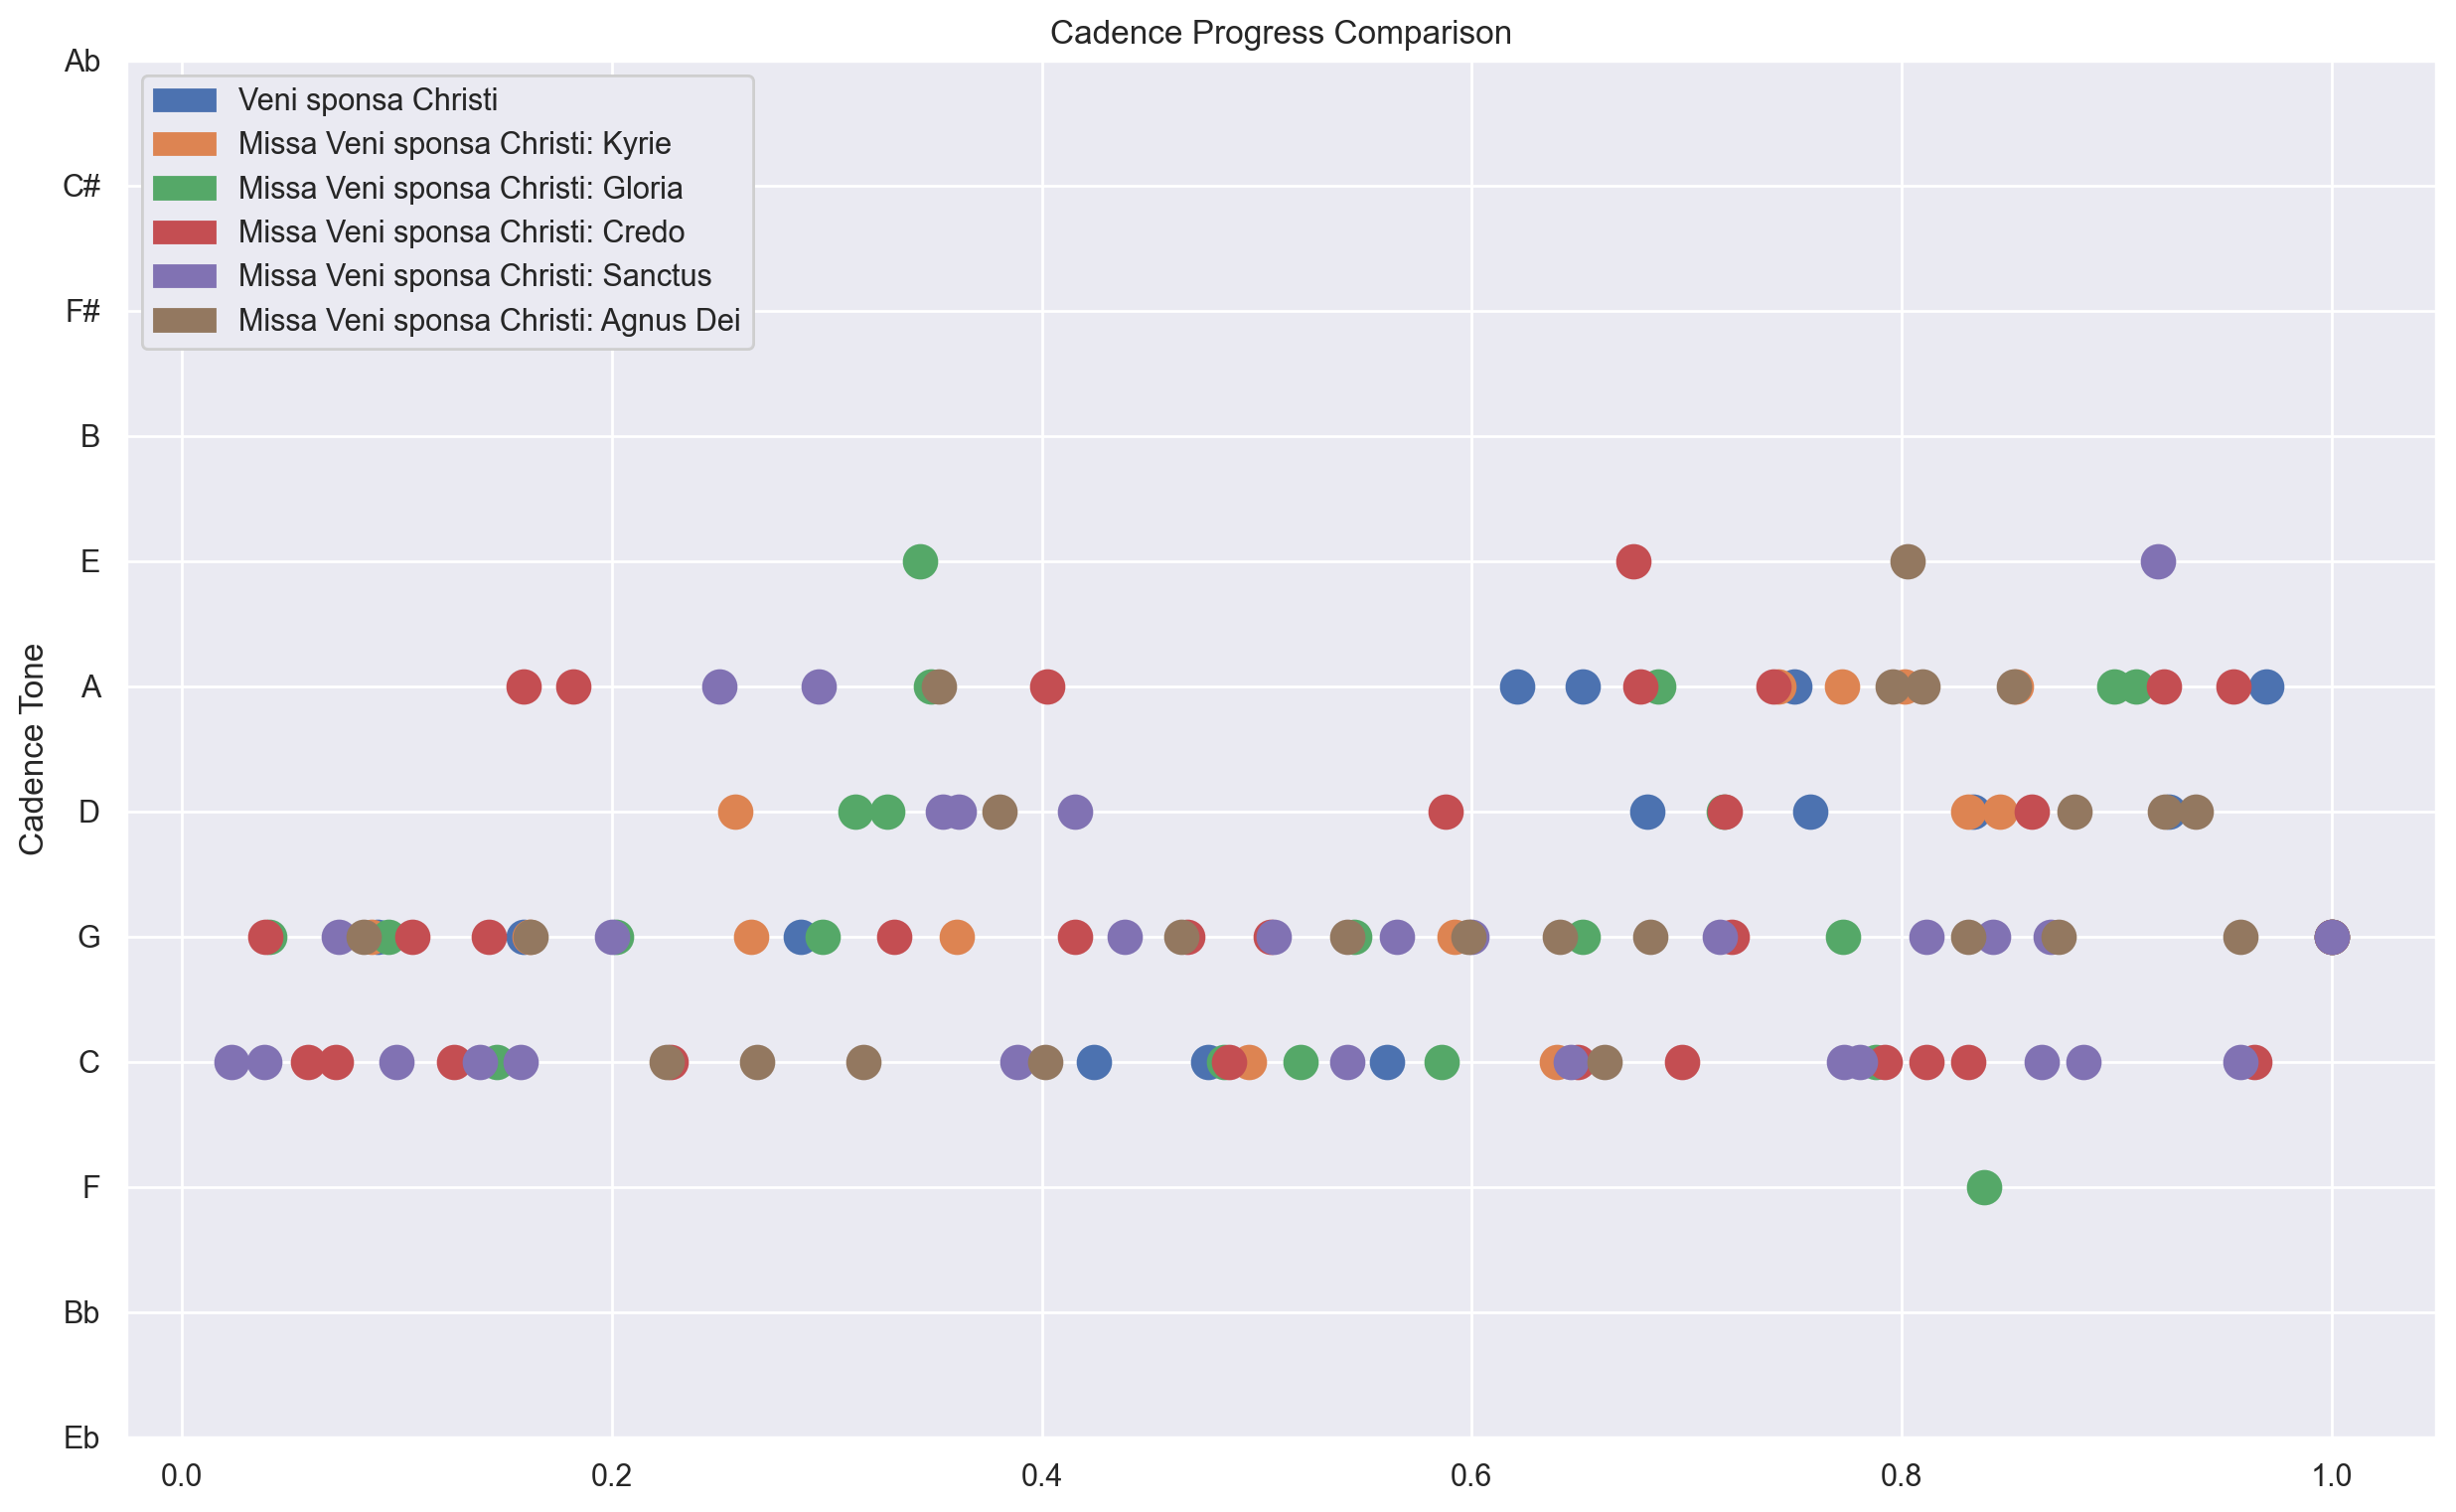

In [64]:
corpus.compareCadenceProgressPlots(includeType=False, cadTone=None, cadType=None, includeLegend=True)


#### Show the progress of cadences for a single piece:

The plot normalizes all cadences on a graph from beginning (0) to the end (1) of the piece.

```piece.cadenceProgressPlot(includeType=True)``` shows details of cadence types.
```piece.cadenceProgressPlot(includeType=False)``` shows only the tone of each cadence


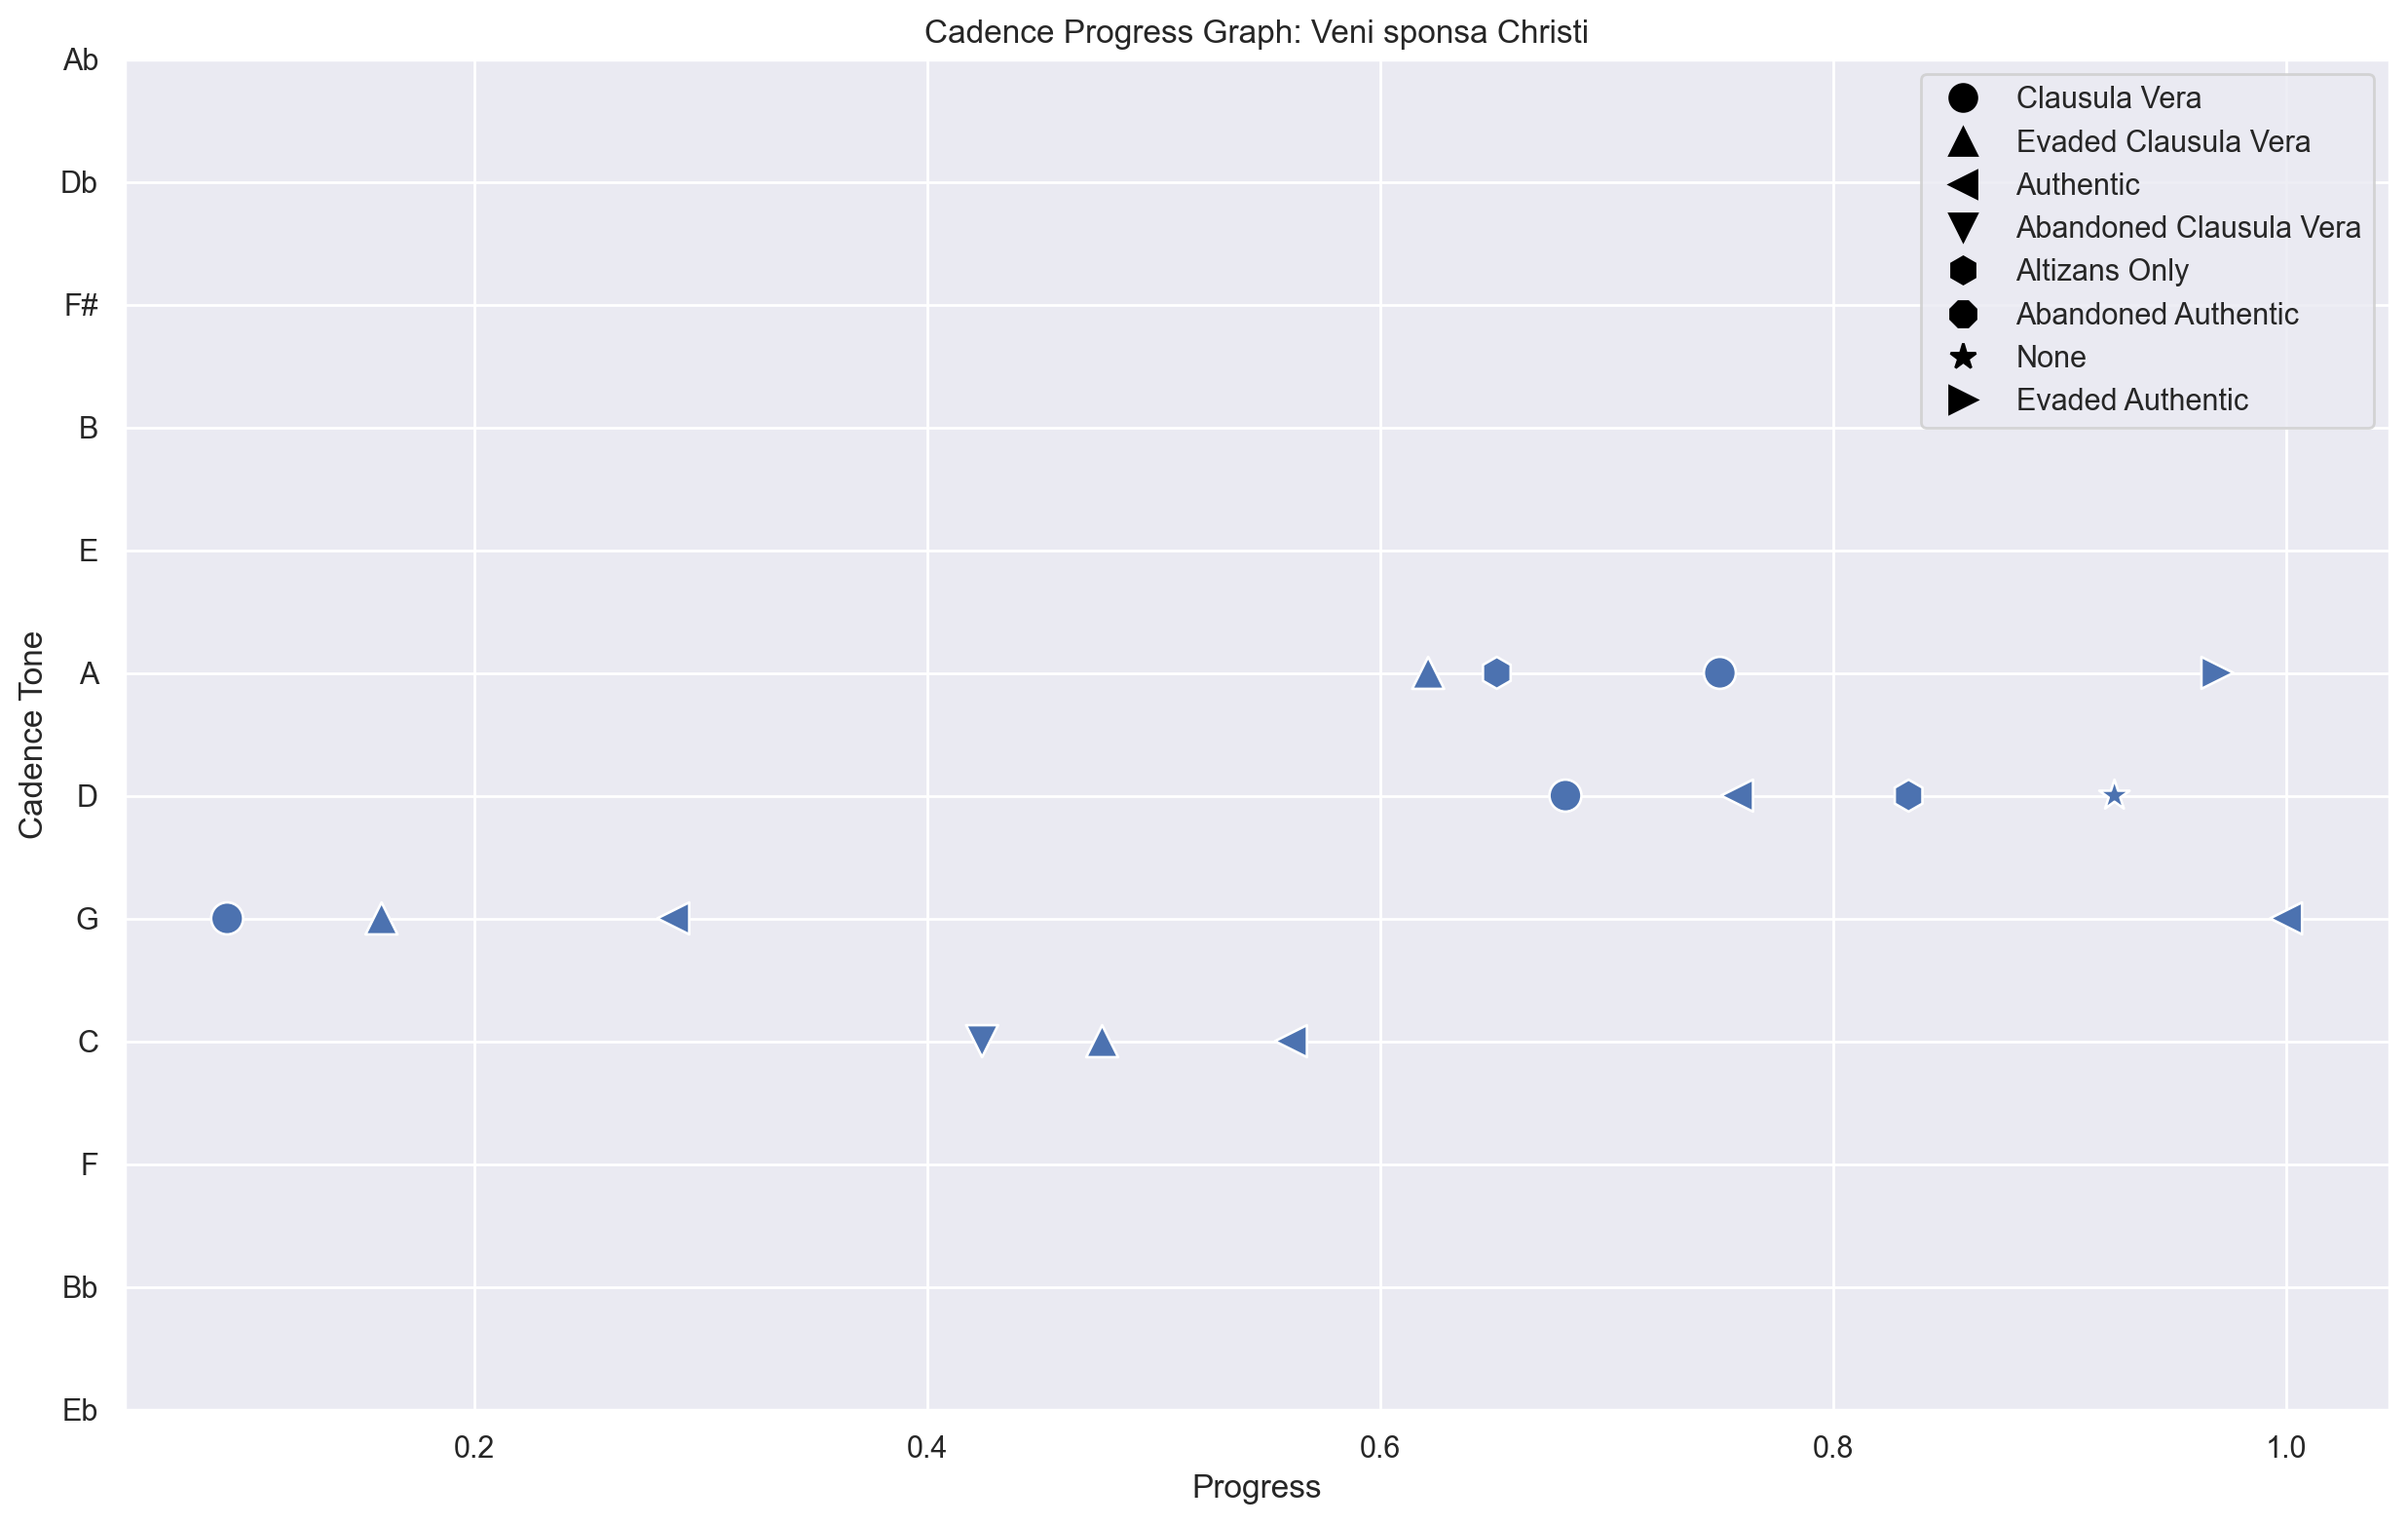

In [65]:
piece.cadenceProgressPlot(includeType=True)


### 2.8 Shared Sequences of Cadences

* Here we find all the 'sets' of three cadences in each piece and group them by set.

* Which substrings are shared?  In which pieces?

In [66]:
combined_df["NextCad"] = combined_df.groupby('Title')["Tone"].shift(-1)
combined_df["PreviousCad"] = combined_df.groupby('Title')["Tone"].shift(1)
combined_df = combined_df.fillna('')
combined_df["CadenceSet"] = combined_df[["PreviousCad", "Tone", "NextCad"]].apply("_".join, axis=1)
groupedCadenceSets = combined_df.groupby(['CadenceSet', 'Composer', 'Title']).size().reset_index(name='counts')
groupedCadenceSets = groupedCadenceSets[groupedCadenceSets['counts'] > 1]
groupedCadenceSets.sort_values(['counts', 'CadenceSet'], ascending=False)


,CadenceSet,Composer,Title,counts
132,_G_,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,3
99,G_C_G,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,3
143,__G,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,2
137,_G_C,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,2
117,G__G,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Agnus Dei,2
108,G_G_C,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,2
92,G_C_C,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,2
76,D__D,Giovanni Pierluigi da Palestrina,Veni sponsa Christi,2
53,C__,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Credo,2
49,C_G_C,Giovanni Pierluigi da Palestrina,Missa Veni sponsa Christi: Sanctus,2


## 2.9 ==> Your Commentary on the Cadence Tables and Charts

* Now that you have explored the cadences in *order* of their appearance, what additional similarities or differences do you notice about your pieces?

* Are there any shared *sets* of cadences in your pieces?  How does the evidence of the sets compare with what you learned from the radar plots?



# 3.  Overall Conclusions

## ==> Your Commentary on the Cadence Tables and Charts

- How are your chosen pieces most related?  Most different?  Write a few sentences and provide some highlights from your analysis